<a href="https://colab.research.google.com/github/MoosaSaadat/handsonml/blob/master/noise_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

print(tf.__version__)

2.2.0


In [3]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Train Shape: {x_train.shape}")
print(f"Test Shape: {x_test.shape}")

Train Shape: (60000, 28, 28)
Test Shape: (10000, 28, 28)


In [5]:
# Transform data
x_train = x_train / 255
x_test = x_test / 255
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))
print(f"Train Shape: {x_train.shape}")
print(f"Test Shape: {x_test.shape}")

Train Shape: (60000, 784)
Test Shape: (10000, 784)


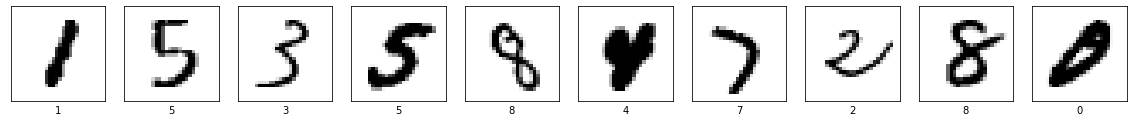

In [20]:
# Visualize dataset
def plot(x, p, labels=False):
  plt.figure(figsize=(20,2))
  indices = np.random.randint(x.shape[0], size=10)
  for i, idx in enumerate(indices):
    plt.subplot(1, 10, i+1)
    plt.imshow(x[idx].reshape(28,28), cmap="binary")
    plt.xticks([])
    plt.yticks([])
    if labels:
      plt.xlabel(p[idx])
  plt.show()

plot(x_train, y_train, True)

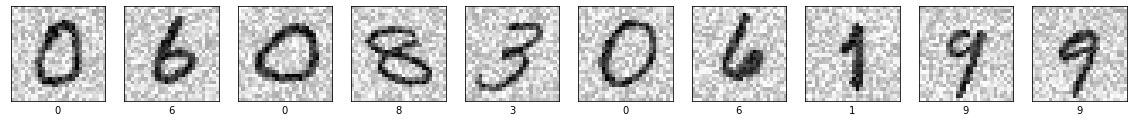

In [53]:
# Add noise
x_train_noisy = x_train + (
    np.random.rand(x_train.shape[0], x_train.shape[1]) * 0.002
)
x_test_noisy = x_test + (
    np.random.rand(x_test.shape[0], x_test.shape[1]) * 0.002
)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

plot(x_train_noisy, y_train, True)

In [54]:
# Create model
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,))  ,
  Dense(256, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
